# World Happiness Data Analysis and Visualization

In [1]:
# importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
import matplotlib.gridspec as gridspec
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns

In [2]:
# Input of world happiness data 

df=pd.read_csv("C:\\Users\\User\\Desktop\\CSS\\Final Project\\World-s-Happines-Analysis-master\\World-s-Happines-Analysis-master\\WorldHappinessIndex.csv")

In [3]:
df.head(10)

Happiness Score  Standard Error   Income   Family  Freedom  \
0            7.587         0.03411  1.39651  1.34951  0.66557   
1            7.561         0.04884  1.30232  1.40223  0.62877   
2            7.527         0.03328  1.32548  1.36058  0.64938   
3            7.522         0.03880  1.45900  1.33095  0.66973   
4            7.427         0.03553  1.32629  1.32261  0.63297   
5            7.406         0.03140  1.29025  1.31826  0.64169   
6            7.378         0.02799  1.32944  1.28017  0.61576   
7            7.364         0.03157  1.33171  1.28907  0.65980   
8            7.286         0.03371  1.25018  1.31967  0.63938   
9            7.284         0.04083  1.33358  1.30923  0.65124   

   Trust (Government Corruption)  Generosity  
0                        0.41978     0.29678  
1                        0.14145     0.43630  
2                        0.48357     0.34139  
3                        0.36503     0.34699  
4                        0.32957     0.45811  
5                        0.41372     0.23351  
6                        0.31814     0.47610  
7                        0.43844     0.36262  
8                        0.42922     0.47501  
9                        0.35637     0.43562

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Income                         158 non-null    float64
 3   Family                         158 non-null    float64
 4   Freedom                        158 non-null    float64
 5   Trust (Government Corruption)  158 non-null    float64
 6   Generosity                     158 non-null    float64
dtypes: float64(7)
memory usage: 8.8 KB


In [5]:
df.describe()

Happiness Score  Standard Error      Income      Family     Freedom  \
count       158.000000      158.000000  158.000000  158.000000  158.000000   
mean          5.375734        0.047885    0.846137    0.991046    0.428615   
std           1.145010        0.017146    0.403121    0.272369    0.150693   
min           2.839000        0.018480    0.000000    0.000000    0.000000   
25%           4.526000        0.037268    0.545808    0.856823    0.328330   
50%           5.232500        0.043940    0.910245    1.029510    0.435515   
75%           6.243750        0.052300    1.158448    1.214405    0.549092   
max           7.587000        0.136930    1.690420    1.402230    0.669730   

       Trust (Government Corruption)  Generosity  
count                     158.000000  158.000000  
mean                        0.143422    0.237296  
std                         0.120034    0.126685  
min                         0.000000    0.000000  
25%                         0.061675    0.150553  
50%                         0.107220    0.216130  
75%                         0.180255    0.309883  
max                         0.551910    0.795880

In [7]:
df["Happiness Score"].mean()



5.3757341772151905

<AxesSubplot:>

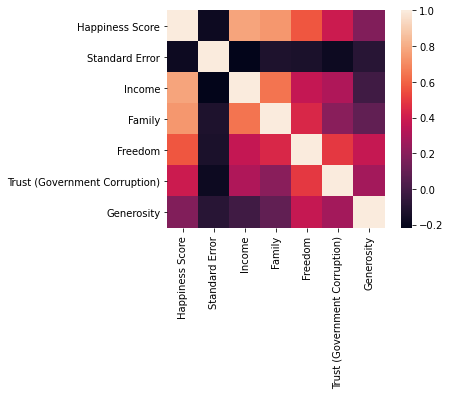

In [8]:
corrmat=df.corr()

sns.heatmap(corrmat, vmax=1, square=True)


<AxesSubplot:>

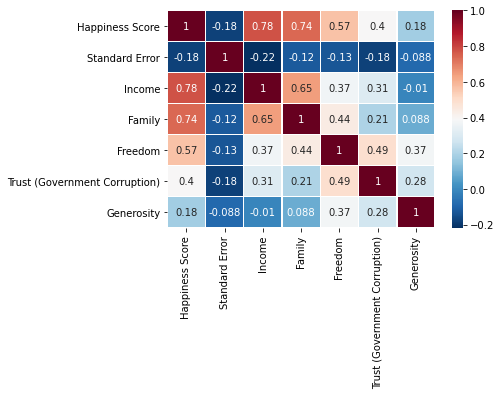

In [9]:
import seaborn as sb

pearsoncorr = df.corr(method='pearson')

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

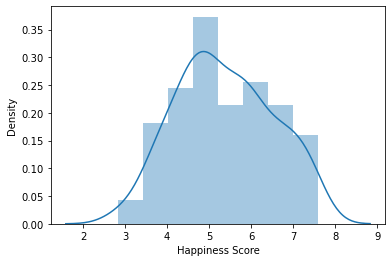

In [10]:
sns.distplot(df['Happiness Score'])

In [12]:
y = df['Happiness Score']
X = df.drop(['Happiness Score'], axis=1)

X

Standard Error   Income   Family  Freedom  Trust (Government Corruption)  \
0           0.03411  1.39651  1.34951  0.66557                        0.41978   
1           0.04884  1.30232  1.40223  0.62877                        0.14145   
2           0.03328  1.32548  1.36058  0.64938                        0.48357   
3           0.03880  1.45900  1.33095  0.66973                        0.36503   
4           0.03553  1.32629  1.32261  0.63297                        0.32957   
..              ...      ...      ...      ...                            ...   
153         0.03464  0.22208  0.77370  0.59201                        0.55191   
154         0.03656  0.28665  0.35386  0.48450                        0.08010   
155         0.05015  0.66320  0.47489  0.15684                        0.18906   
156         0.08658  0.01530  0.41587  0.11850                        0.10062   
157         0.06727  0.20868  0.13995  0.36453                        0.10731   

     Generosity  
0       0.29678  
1       0.43630  
2       0.34139  
3       0.34699  
4       0.45811  
..          ...  
153     0.22628  
154     0.18260  
155     0.47179  
156     0.19727  
157     0.16681  

[158 rows x 6 columns]

In [13]:
from sklearn.linear_model import LinearRegression
# creation of a LinearRegression object 
lm = LinearRegression()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-1.37071377  1.4618397   1.34681514  1.14484387  0.63002129  0.7182574 ]


In [16]:
lm.intercept_

pd.DataFrame(lm.coef_,X.columns, columns=['Coefficients'])

import statsmodels.api as sm
model = sm.OLS(y_train,X_train)
model_results = model.fit()
p_values = model_results.summary2().tables[1]['P>|t|']
round(p_values,4)




Standard Error                   0.0000
Income                           0.0000
Family                           0.0000
Freedom                          0.0048
Trust (Government Corruption)    0.1971
Generosity                       0.0417
Name: P>|t|, dtype: float64

In [17]:
predictions = lm.predict( X_test)


Text(0, 0.5, 'Predicted Y')

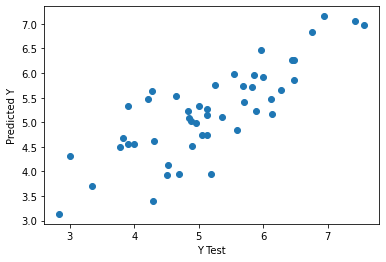

In [18]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [19]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coeffecient
Standard Error                   -1.370714
Income                            1.461840
Family                            1.346815
Freedom                           1.144844
Trust (Government Corruption)     0.630021
Generosity                        0.718257

In [20]:
predictions

array([5.63859084, 5.47218053, 5.71812855, 5.09663258, 6.2701367 ,
       4.48788265, 5.75041195, 5.32144878, 7.15575027, 5.10798255,
       3.93790599, 5.32654013, 5.65094929, 5.42200611, 5.95616061,
       4.73432549, 3.95378767, 5.74735537, 7.06315067, 6.97810645,
       5.85083362, 5.26260763, 5.16452866, 5.2270296 , 4.30826438,
       6.26100791, 5.4748831 , 5.22184854, 3.71219117, 3.13647436,
       4.56740568, 4.5121119 , 5.03406349, 6.46768382, 5.987739  ,
       5.53083166, 3.39861282, 4.84337396, 6.84035568, 3.94883639,
       4.67279939, 4.14010463, 5.15399246, 4.61747465, 4.56101652,
       4.98144687, 4.74923238, 5.91223573])

In [21]:

data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'kavrayskiy7'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

KeyError: 'Country'

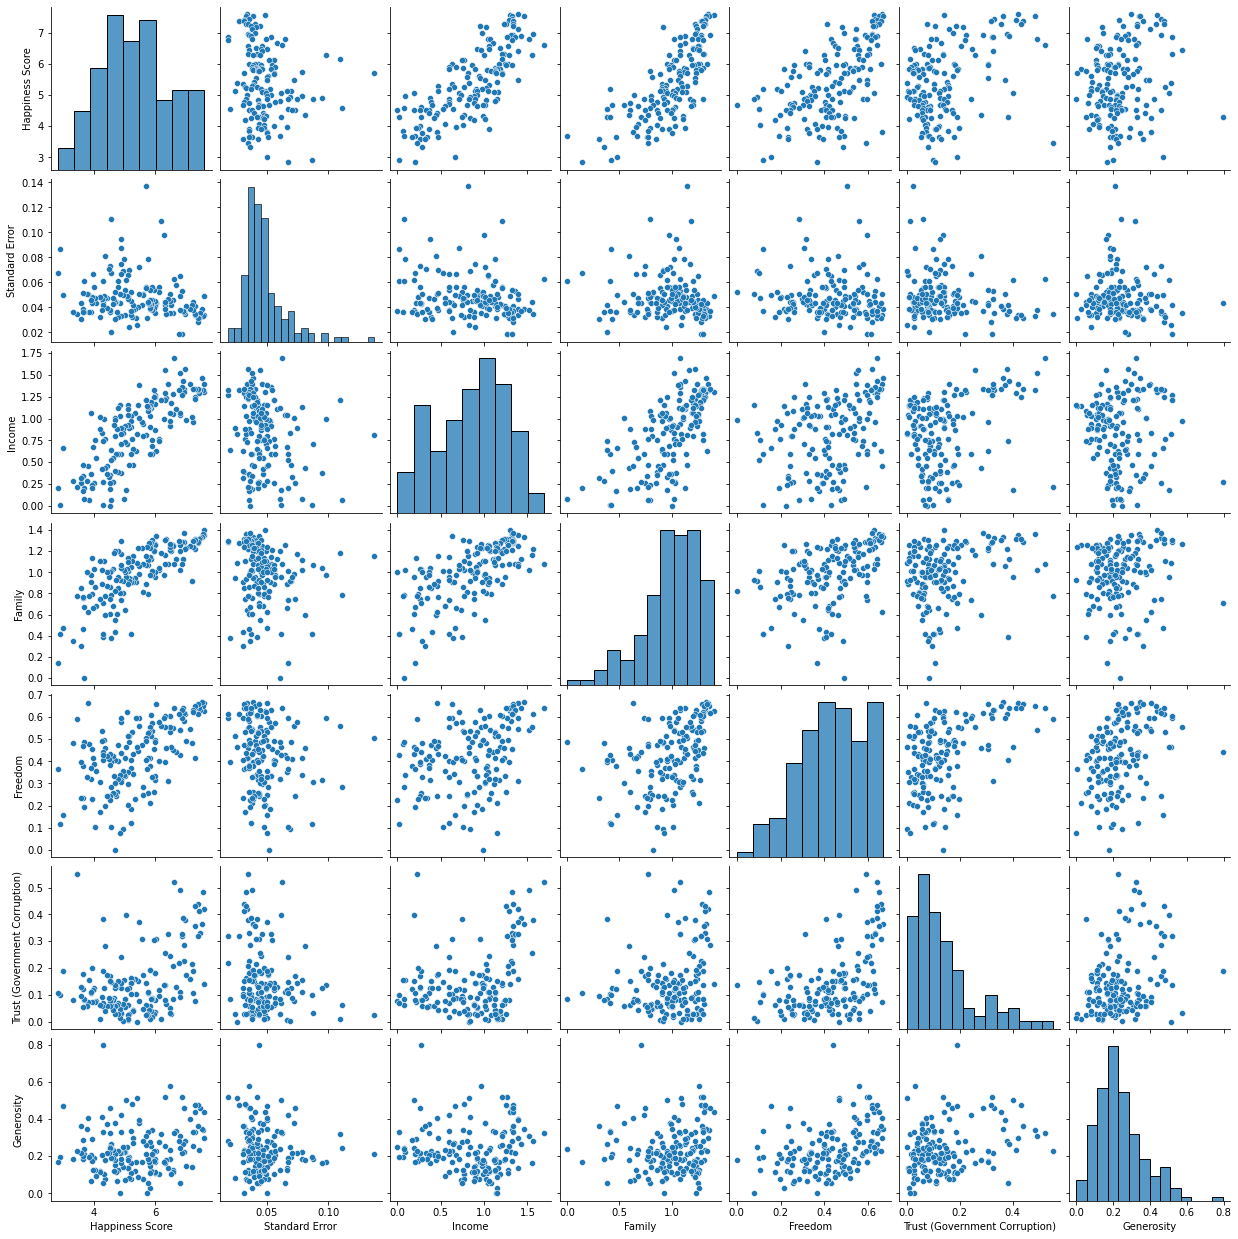

In [41]:
import seaborn as sns

sns.pairplot(df)

In [24]:
import scipy
x=df['Income']
y=df['Happiness Score']

import sklearn
from sklearn.metrics import r2_score

def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

rsquared(x,y)

0.6099071541531226

<AxesSubplot:xlabel='Income', ylabel='Happiness Score'>

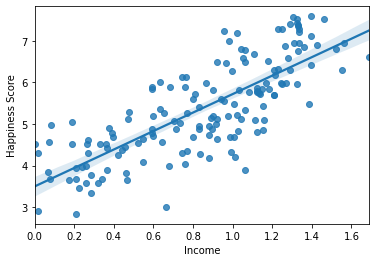

In [25]:
sns.regplot(x='Income',y='Happiness Score' ,data=df)

In [27]:
import scipy 
def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2



In [28]:
fr=['Standard Error', 
    'Income', 'Health'
    'Freedom', 'Trust (Government Corruption)',
    'Generosity']

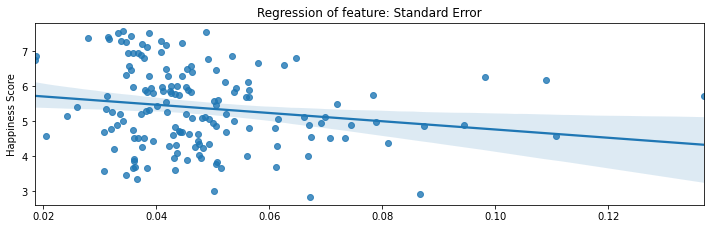

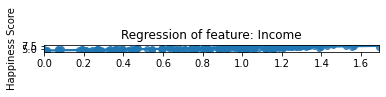

KeyError: 'HealthFreedom'

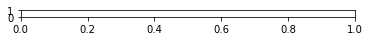

In [29]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(fr):
    ax = plt.subplot(gs[i])
    #sns.distplot(df[cn], bins=50)
    sns.regplot(x=df[cn],y='Happiness Score' ,data=df)
    ax.set_xlabel('')
    ax.set_title('Regression of feature: ' + str(cn))
    plt.show()